# Boston Housing Data

The dataset used for the project comprises of housing data for suburbs in the city of Boston in the United States. The columns are as follows:

* _crim_: per capita crime rate by town.
* _zn_: proportion of residential land zoned for lots over 25,000 sq.ft.
* _indus_: proportion of non-retail business acres per town.
* _chas_: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* _nox_: nitrogen oxides concentration (parts per 10 million).
* _rm_: average number of rooms per dwelling.
* _age_: proportion of owner-occupied units built prior to 1940.
* _dis_: weighted mean of distances to five Boston employment centres.
* _rad_: index of accessibility to radial highways.
* _tax_: full-value property-tax rate per \$10,000.
* _ptratio_: pupil-teacher ratio by town.
* _b_: 1000(Bk - 0.63)^2 where Bk is the proportion of ethnic African-Americans by town.
* _lstat_: lower status of the population (percent).
* _medv_: median value of owner-occupied homes in \$1000s.

In [50]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [51]:
houses = pd.read_csv("housing2.csv")
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Column1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [52]:
houses.Column1.unique()

array([nan])

In [53]:
houses.drop(["Column1"], axis = 1, inplace = True)
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [54]:
ROWS = 2
COLS = 7
index = 0

fig = make_subplots(rows=ROWS, 
                    cols=COLS, 
                    # subplot_titles=houses.columns
                    )

for row in range(ROWS):
  for col in range(COLS):
    fig.add_trace(
        go.Box(y=houses.iloc[:, index].values, name=houses.columns[index]),
        row=row+1, col=col+1
    )
    index += 1

fig.update_layout(height=600, width=1000, title_text="Side By Side Subplots", showlegend=False)
fig.show()

In [55]:
import plotly.express as px
fig = px.histogram(houses, x="CHAS", labels={"CHAS": "Location Relative to Charles River"})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['Not on Charles', 'On Charles River']
    )
)
fig.show()


In [56]:
houses["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [57]:
on_charles = houses[houses["CHAS"] == 1]
no_charles = houses[houses["CHAS"] == 0]

In [58]:
print(f'Number of houses on the Charles {len(on_charles)}.\nNumber of houses not on the Charles {len(no_charles)}.')

Number of houses on the Charles 35.
Number of houses not on the Charles 471.


In [59]:
full_corr = houses.corr()
full_corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [60]:
import numpy as np
x = np.arange(0,1.01, .01)
y = 1000 * (x - 0.63)**2
fig = px.line(x=x, y=y)
fig.show()

In [61]:
pt_med_corr = houses[["PTRATIO", "MEDV"]].corr()
print(pt_med_corr)

          PTRATIO      MEDV
PTRATIO  1.000000 -0.507787
MEDV    -0.507787  1.000000


In [62]:
pt_mean = houses["PTRATIO"].mean()
pt_std = houses["PTRATIO"].std()
print(f'The mean of pupil teacher ratio is {pt_mean:.2f}.\nThe standard deviation is {pt_std:.2f}.')

The mean of pupil teacher ratio is 18.46.
The standard deviation is 2.16.


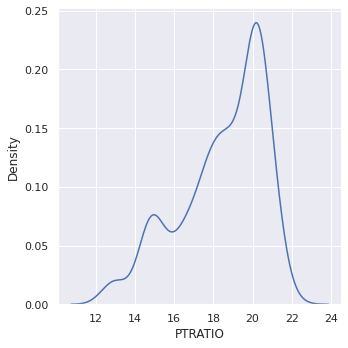

In [63]:
import seaborn as sns
sns.displot(houses, x="PTRATIO", kind="kde")

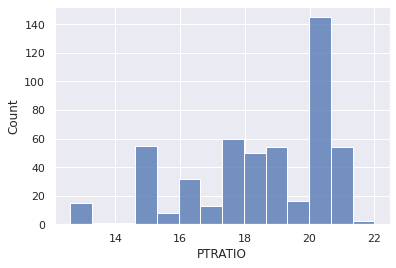

In [64]:
sns.histplot(data=houses, x="PTRATIO")

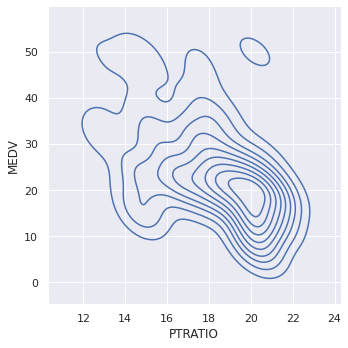

In [65]:
sns.displot(houses, x="PTRATIO", y="MEDV", kind="kde")

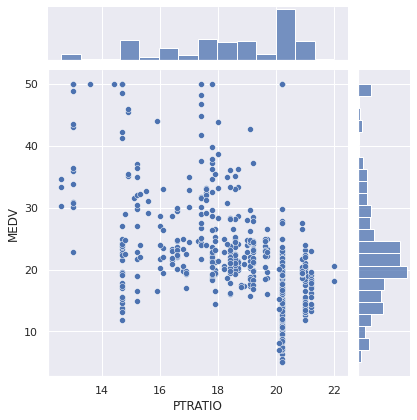

In [66]:
sns.jointplot(data=houses, x="PTRATIO", y="MEDV")

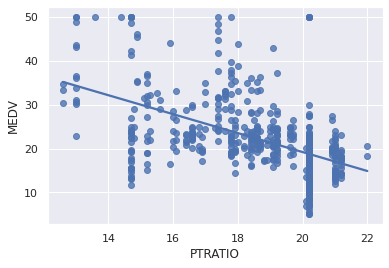

In [67]:
sns.regplot(x="PTRATIO", 
            y="MEDV", 
            data=houses,
            ci=None)

In [68]:
from statsmodels.formula.api import ols
mdl_pt_vs_medv = ols("MEDV~PTRATIO", data=houses)
mdl_pt_vs_medv = mdl_pt_vs_medv.fit()
print(mdl_pt_vs_medv.params)

Intercept    62.344627
PTRATIO      -2.157175
dtype: float64


In [69]:
mdl_pt_vs_medv.pvalues[1]

1.6095094784725852e-34

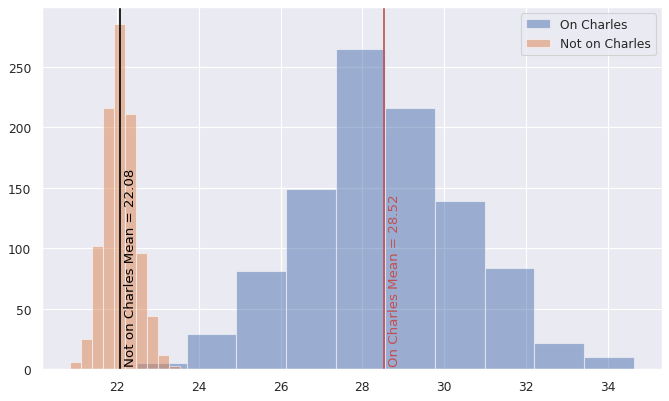

In [70]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
sns.set_theme()

mean_on_charles, mean_no_charles = [], []
for i in range(1000):
  mean_on_charles.append(np.mean(on_charles.sample(frac=1, replace=True)['MEDV']))
  mean_no_charles.append(np.mean(no_charles.sample(frac=1, replace=True)['MEDV']))

plt.hist(mean_on_charles, alpha=0.5, label='On Charles')
plt.axvline(np.mean(mean_on_charles), color='r')
plt.text(np.mean(mean_on_charles) + .1, 5 , f'On Charles Mean = {np.mean(mean_on_charles):.2f}', rotation=90, color='r')
plt.hist(mean_no_charles, alpha=0.5, label='Not on Charles')
plt.axvline(np.mean(mean_no_charles), color='black')
plt.text(np.mean(mean_no_charles) + .1, 5 , f'Not on Charles Mean = {np.mean(mean_no_charles):.2f}', rotation=90, color='black')
plt.legend(loc='upper right')
plt.show()

In [71]:
on_charles_sd = np.std(mean_on_charles, ddof=1) * np.sqrt(1000)
no_charles_sd = np.std(mean_no_charles, ddof=1) * np.sqrt(1000)
print(f'The standard deviation for houses on the Charles River is {on_charles_sd}.')
print(f'The standard deviation for houses not on the Charles River is {no_charles_sd}.')

The standard deviation for houses on the Charles River is 62.45188932616.
The standard deviation for houses not on the Charles River is 12.523868542193298.


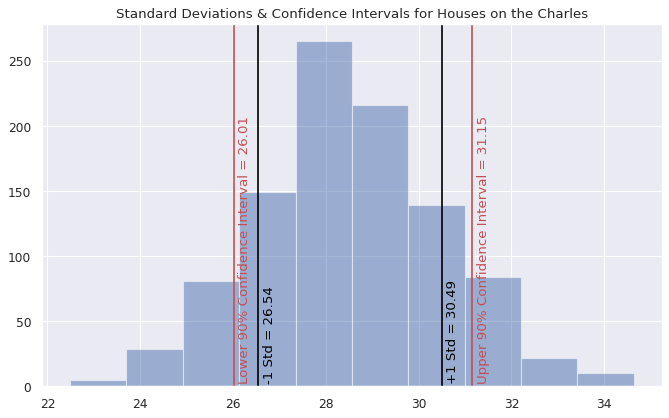

In [97]:
figure(figsize=(10, 6), dpi=80)
sns.set_theme()

on_charles_low_std = np.mean(mean_on_charles) - np.std(mean_on_charles, ddof=1)
on_charles_up_std = np.mean(mean_on_charles) + np.std(mean_on_charles, ddof=1)
oc_ci_95 = np.quantile(mean_on_charles, .9)
oc_ci_05 = np.quantile(mean_on_charles, .1)

plt.hist(mean_on_charles, alpha=0.5, label='On Charles')
plt.axvline(on_charles_low_std, color='black')
plt.text(on_charles_low_std + .1, 5 , f'-1 Std = {on_charles_low_std:.2f}', rotation=90, color='black')
plt.axvline(on_charles_up_std, color='black')
plt.text(on_charles_up_std + .1, 5 , f'+1 Std = {on_charles_up_std:.2f}', rotation=90, color='black')
plt.axvline(oc_ci_95 , color='r')
plt.text(oc_ci_95 + .1, 5, f'Upper 90% Confidence Interval = {oc_ci_95:.2f}', rotation=90, color='r')
plt.axvline(oc_ci_05 , color='r')
plt.text(oc_ci_05 + .1, 5, f'Lower 90% Confidence Interval = {oc_ci_05:.2f}', rotation=90, color='r')
plt.title('Standard Deviations & Confidence Intervals for Houses on the Charles')
plt.show()

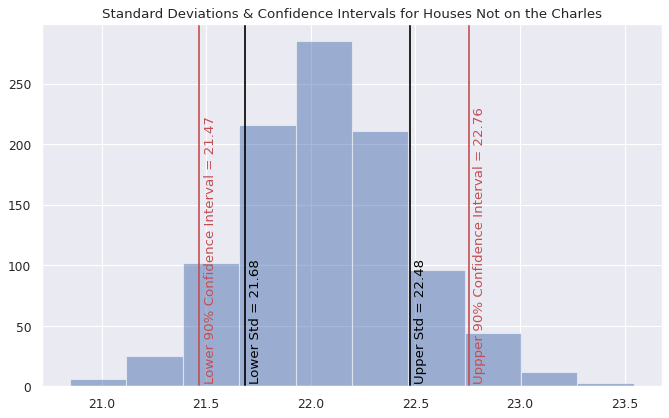

In [96]:
figure(figsize=(10, 6), dpi=80)
sns.set_theme()

no_charles_low_std = np.mean(mean_no_charles) - np.std(mean_no_charles, ddof=1)
no_charles_up_std = np.mean(mean_no_charles) + np.std(mean_no_charles, ddof=1)
nc_ci_95 = np.quantile(mean_no_charles, .95)
nc_ci_05 = np.quantile(mean_no_charles, .05)

plt.hist(mean_no_charles, alpha=0.5, label='On Charles')
plt.axvline(no_charles_low_std , color='black')
plt.text(no_charles_low_std + .02, 5 , f'Lower Std = {no_charles_low_std:.2f}', rotation=90, color='black')
plt.axvline(no_charles_up_std, color='black')
plt.text(no_charles_up_std + .02, 5 , f'Upper Std = {no_charles_up_std:.2f}', rotation=90, color='black')
plt.axvline(nc_ci_95 , color='r')
plt.text(nc_ci_95 + .02, 5, f'Upper 90% Confidence Interval = {nc_ci_95:.2f}', rotation=90, color='r')
plt.axvline(nc_ci_05 , color='r')
plt.text(nc_ci_05 + .02, 5, f'Lower 90% Confidence Interval = {nc_ci_05:.2f}', rotation=90, color='r')
plt.title('Standard Deviations & Confidence Intervals for Houses Not on the Charles')
plt.show()

In [74]:
from scipy.stats import norm
on_charles_samp_mean = np.mean(mean_on_charles)
no_charles_samp_mean = np.mean(mean_no_charles)

mean_boot_dist = []

for i in range(1000):
  mean_boot_dist.append(np.mean(houses.sample(frac=1, replace=True)['MEDV']))

std_error = np.std(mean_boot_dist, ddof=1)
z_score = (on_charles_samp_mean - no_charles_samp_mean) / std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
print(f'Calculated p-value: {p_value}. Norm.sf p-value {norm.sf(abs(z_score))}')

Calculated p-value: 0.0. Norm.sf p-value 5.252084760341761e-60


In [75]:
from statsmodels.stats.power import TTestIndPower

obj = TTestIndPower()
n = obj.solve_power(effect_size=0.6, alpha=0.01, power=0.8, 
                    ratio=1, alternative='larger')
print(f'The required group size is {n}.')

The required group size is 57.12867283403785.


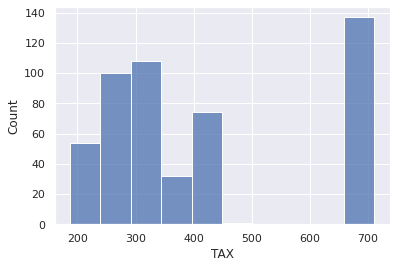

In [76]:
sns.histplot(data=houses, x="TAX")

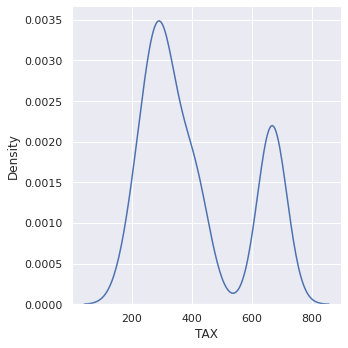

In [77]:
sns.displot(houses, x="TAX", kind="kde")

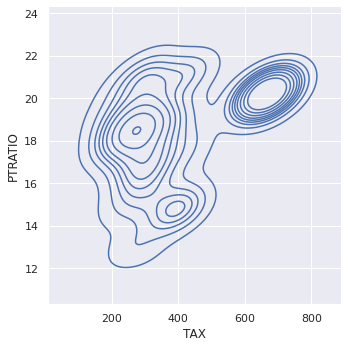

In [78]:
sns.displot(houses, x="TAX", y="PTRATIO", kind="kde")

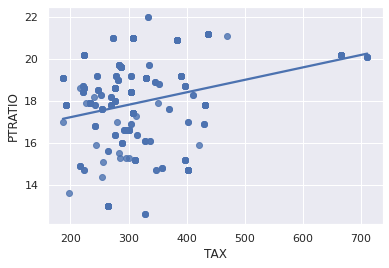

In [79]:
sns.regplot(x="TAX", 
            y="PTRATIO", 
            data=houses,
            ci=None)
            

In [80]:
tax_pt_vs_medv = ols("PTRATIO~TAX", data=houses)
tax_pt_vs_medv = tax_pt_vs_medv.fit()
print(tax_pt_vs_medv.params)

Intercept    16.038813
TAX           0.005920
dtype: float64


In [81]:
tax_pt_vs_medv.pvalues[1]

5.686832643720614e-28

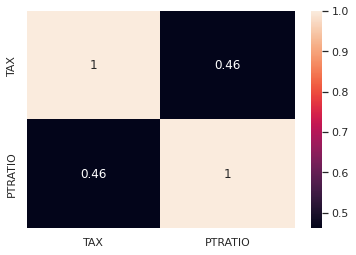

In [82]:
tax_pt_corr = houses[["TAX", "PTRATIO"]].corr()
sns.heatmap(tax_pt_corr, 
        xticklabels=tax_pt_corr.columns,
        yticklabels=tax_pt_corr.columns, 
        annot=True)

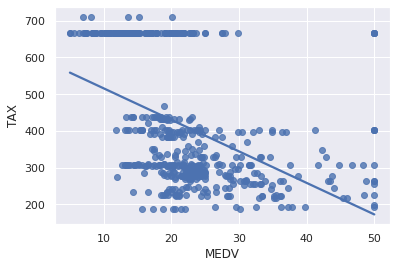

In [83]:
sns.regplot(x="MEDV", 
            y="TAX", 
            data=houses,
            ci=None)

In [84]:
mdl_medv_vs_tax = ols("TAX~MEDV", data=houses)
mdl_medv_vs_tax = mdl_medv_vs_tax.fit()
print(mdl_medv_vs_tax.params)

Intercept    601.70226
MEDV          -8.58593
dtype: float64


In [85]:
houses[houses["MEDV"] <= 10]["TAX"].mean()

669.75

In [86]:
houses[houses["MEDV"] >= 50]["TAX"].mean()

415.4375

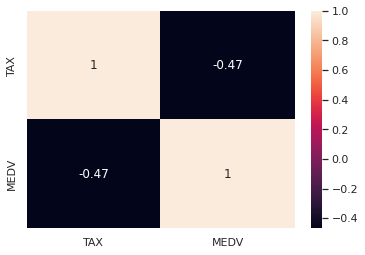

In [87]:
tax_medv_corr = houses[["TAX", "MEDV"]].corr()
sns.heatmap(tax_medv_corr, 
        xticklabels=tax_medv_corr.columns,
        yticklabels=tax_medv_corr.columns, 
        annot=True)

In [88]:
mdl_medv_vs_tax.pvalues[1]

5.637733627691044e-29

In [89]:
mdl_medv_vs_pt = ols("PTRATIO~MEDV", data=houses)
mdl_medv_vs_pt = mdl_medv_vs_pt.fit()
print(mdl_medv_vs_pt.params)

Intercept    21.148882
MEDV         -0.119530
dtype: float64


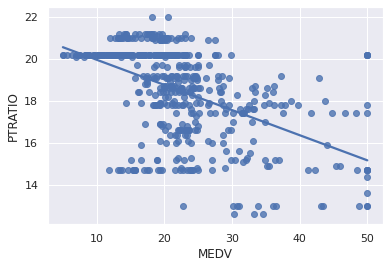

In [90]:
sns.regplot(x="MEDV", 
            y="PTRATIO", 
            data=houses,
            ci=None)

In [91]:
mdl_medv_vs_pt.pvalues[1]

1.6095094784734367e-34

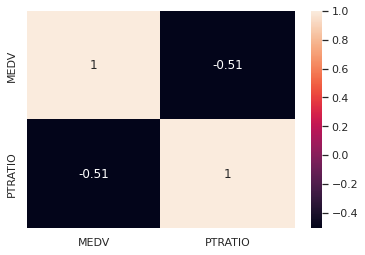

In [92]:
medv_vs_pt_corr = houses[["MEDV", "PTRATIO"]].corr()
sns.heatmap(medv_vs_pt_corr, 
        xticklabels=medv_vs_pt_corr.columns,
        yticklabels=medv_vs_pt_corr.columns, 
        annot=True)

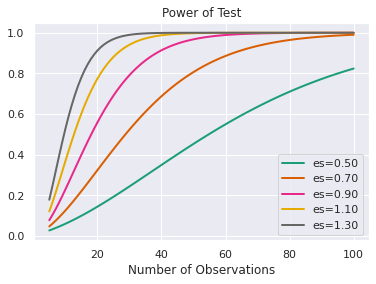

In [101]:
from statsmodels.stats.power import TTestIndPower

power_analysis = TTestIndPower()

power_analysis.plot_power(
    dep_var="nobs",
    nobs=np.arange(5, 101),
    effect_size=np.arange(0.5, 1.5, .2),
    alpha=0.01,
)

plt.show()